In [1]:
# Import necessary libraries
import os
import gym
from environments.energy_management_env import EnergyManagementEnv

# Import the Agent class from your code


# Import environment registration function
from environments.env_registration import register_env

# Define environment parameters
env_params = {
    'SOC_min': 0.2,
    'SOC_max': 0.8,
    'E': 1000,
    'lambda_val': 0.1,
    'data_path': 'data/Data_input.csv',
    'initial_SOC': 0.5  # Set to None if not using an initial_SOC
}

# Register the custom environment
register_env('EnergyManagement-v0', 'environments.env_registration:environment_creator',{'environment_class': EnergyManagementEnv, **env_params})

from rl_monitoring_utils.vectorized_env_wrapper import VectorizedEnvWrapper
from policies.categorical_policy import CategoricalPolicy
from learning_utils.value_estimator import ValueEstimator
from agents.a2c import A2C
from agents.a2c_warm_start import A2C_WarmStart
from agents.ppo import PPO
from agents.reinforce import REINFORCE
import gym

energy_management = VectorizedEnvWrapper(gym.make("EnergyManagement-v0"), num_envs=8)

Running PPO_10
Running PPO_1.247129703338658
Running PPO_0.126720703978657
Running PPO_0.019319103298657
Running PPO_0.001185903648657
Running PPO_0.000151503358656


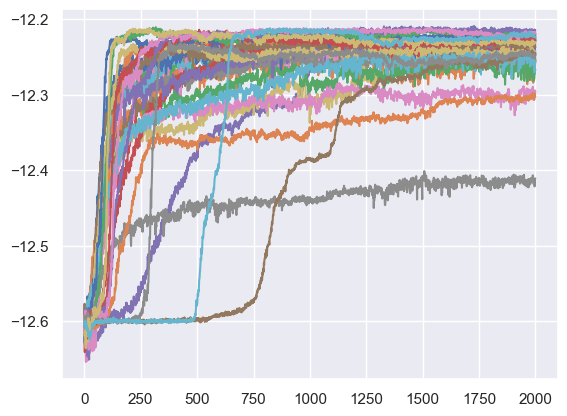

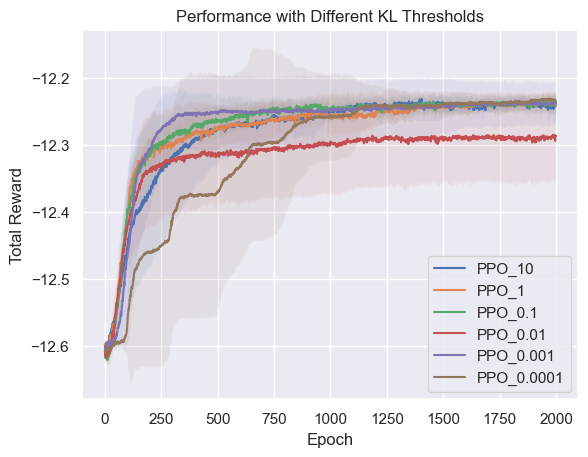

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define a function to run experiments multiple times and collect results
def run_experiment(env, policy_class, agent_class, hidden_sizes, kl_threshold, epochs, gamma, T, num_runs):
    totals = []
    for _ in range(num_runs):
        policy = policy_class(env, lr=1e-2, hidden_sizes=hidden_sizes)
        value_estimator = ValueEstimator(env, lr=1e-2)
        # Pass the kl_threshold parameter to the PPO constructor
        agent, total_rewards = agent_class(env, policy, value_estimator, kl_threshold=kl_threshold, epochs=epochs, gamma=gamma, T=T)
        totals.append(total_rewards)
    return totals

# Configuration for experiments with various kl_threshold values
kl_thresholds = [10, 1, 0.1, 0.01, 0.001, 0.0001]
hidden_sizes = [16]  # fixed hidden sizes
num_runs = 5
epochs = 2000
gamma = 1
T = 720

results = {}
# Run experiments for all kl_threshold values
for kl in kl_thresholds:
    label = f'PPO_{kl}'
    print(f"Running {label}")
    results[label] = run_experiment(energy_management, CategoricalPolicy, PPO, hidden_sizes, kl, epochs, gamma, T, num_runs)

# Plot results
fig, ax = plt.subplots()
for label, data in results.items():
    means = np.mean(data, axis=0)
    stddev = np.std(data, axis=0)
    epochs_range = range(len(means))
    ax.plot(epochs_range, means, label=label)
    ax.fill_between(epochs_range, means - stddev, means + stddev, alpha=0.1)
ax.set_title('Performance with Different KL Thresholds')
ax.set_xlabel('Epoch')
ax.set_ylabel('Total Reward')
ax.legend()
plt.show()
